In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [41]:
import os
def running_in_colab():
    try:
        import google.colab  # type: ignore
        return True
    except Exception:
        return False

if running_in_colab():
    from google.colab import drive
    drive.mount('/content/drive')
    # Default data path in Colab (adjust if your files are in a specific folder)
    data_path = '/content/drive/MyDrive/'
    data_file_override = None
else:
    # Local environment — default to current working directory (change if needed)
    data_path = os.path.abspath(os.getcwd())
    # If data_path is accidentally a file, use its parent directory
    if os.path.isfile(data_path):
        data_path = os.path.dirname(data_path)
    # You provided a specific file path. Set the folder and override below (change if different):
    data_path = r'D:\SCT_ML_2'
    data_file_override = r'D:\SCT_ML_2\Mall_Customers.csv'

print('data_path =', data_path)
print('data_file_override =', data_file_override)
print('If these are not correct, edit this cell and set data_path and/or data_file_override, then re-run.')

data_path = D:\SCT_ML_2
data_file_override = D:\SCT_ML_2\Mall_Customers.csv
If these are not correct, edit this cell and set data_path and/or data_file_override, then re-run.


In [42]:
# loading the data from csv file to a Pandas DataFrame
try:
    file_path = r'D:\SCT_ML_2\Mall_Customers.csv'  # Use raw string to handle backslashes
    print(f'Loading data from: {file_path}')
    print(f'File exists: {os.path.exists(file_path)}')
    customer_data = pd.read_csv(file_path)
    print('Data loaded successfully!')
    print(f'Shape: {customer_data.shape}')
except Exception as e:
    print(f'Error loading data: {e}')

Loading data from: D:\SCT_ML_2\Mall_Customers.csv
File exists: True
Data loaded successfully!
Shape: (200, 5)


In [43]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [46]:
X = customer_data.iloc[:,[3,4]].values

In [47]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
# Set thread limit to avoid memory leak on Windows
import os
os.environ['OMP_NUM_THREADS'] = '1'

# finding wcss value for different number of clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        random_state=42,
        n_init=10  # Set explicitly to avoid warning
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

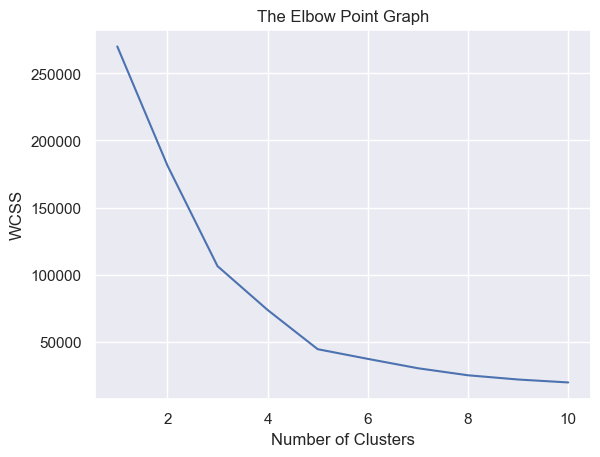

In [49]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Training the k-Means Clustering Model

In [50]:
# Make sure thread limit is set (in case this cell is run separately)
import os
os.environ['OMP_NUM_THREADS'] = '1'

kmeans = KMeans(
    n_clusters=5,
    init='k-means++',
    random_state=0,
    n_init=10  # Set explicitly to avoid warning
)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

c:\Users\home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


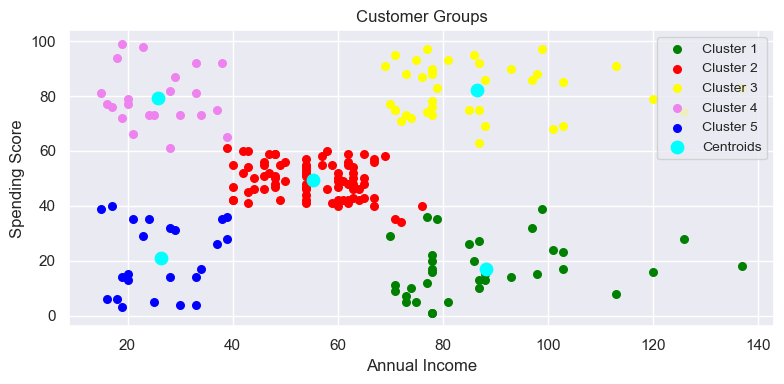

In [55]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,4))  # Wider figure for more length along the x-axis
plt.scatter(X[Y==0,0], X[Y==0,1], s=30, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=30, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=30, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=30, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=30, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=80, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(loc='upper right', fontsize='small')  # Legend inside to save vertical space
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()